In [14]:
##This script will plot genotypes vs expression for a given gene and variant SNP or STR position
##You have to know which chromosome the pair (gene-var) belongs to.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as ss

T = ['WholeBlood','Cells-Transformedfibroblasts','Muscle-Skeletal','Lung','Adipose-Subcutaneous','Artery-Tibial','Esophagus-Mucosa']
tissue=T[6]
ch='chr14'
gene='ENSG00000100852.8' 
var_snp='NA'  ########### OR 'NA' if STR alone 
var_str=32521434
GG='ARHGAP5'      ### Optional gene name for label

In [15]:
if var_snp !='NA':
    snp=pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/SNP_Analysis/SNP_Geno"+ch, sep='\t') #snps
srt=pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Normalized_Genotypes/STR_Norm_Gen."+ch, sep='\t')
expr=pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/"+tissue+"/Corr_Expr.csv",sep=',' )
print( srt.shape,' ',expr.shape)
#snp=snp.loc[snp['chrom']==ch]          #srt=srt.loc[srt['chrom']==ch]
#print(snp.shape, ' ', srt.shape,' ',expr.shape)
samples=list(expr.index)
data=expr[gene]

if var_snp !='NA':
    genotype_snp = snp.loc[snp['start']==var_snp,samples]
    genotype_snp = genotype_snp.replace('None', np.nan)
    print(np.count_nonzero(genotype_snp.values=='None'))
genotype_str=srt.loc[srt['start']==var_str,samples]
print(np.count_nonzero(genotype_str.values=='None'),'\n', len(data))
genotype_str = genotype_str.replace('None', np.nan)

(24229, 150)   (101, 26870)
14 
 101


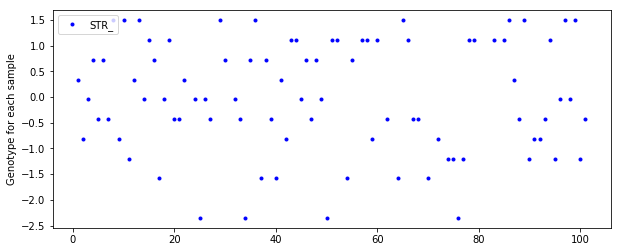

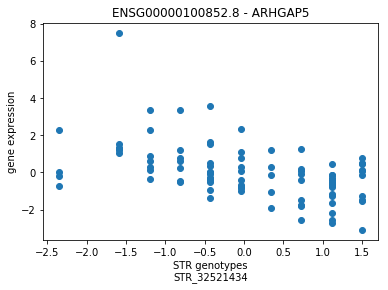

In [16]:
x =  range(1,len(data)+1,1)
#GG="NT5C3B "
fig=plt.figure(figsize=(10,4))
#ax1 = fig.add_subplot(111)

plt.plot(x,genotype_str.values.T.tolist(),'.', c='b', label='STR_')
plt.legend(loc='upper left')
plt.ylabel('Genotype for each sample')
plt.show()

if var_snp !='NA':
    plt.plot(x,genotype_snp.values.T.tolist(), '*', c='g',label='SNP_')
    plt.show()
    plt.scatter(genotype_snp, data)
    plt.ylabel('gene expression')
    plt.xlabel('SNP genotypes')
    plt.show()
plt.scatter(genotype_str, data, label=GG)
plt.ylabel('gene expression')
plt.xlabel('STR genotypes\nSTR_'+str(var_str))
plt.title(gene+' - '+GG)
plt.show()

##Hold snp genotypes constant
if var_snp !='NA':
    geno=list(set(genotype_snp.values.tolist()[0]))
    geno=list(set([x for x in np.nan_to_num(geno) if x!='nan']))
    n=len(geno)
    ind=genotype_snp.index[0]
    fig = plt.figure(figsize=(10, 12)) 
    for i in range(len(geno)):
        print(geno[i])
        S=0
        S = genotype_snp.T.loc[genotype_snp.T[ind]==geno[i]]
        sample=list(S.index)
        S['Exp']=data.loc[sample]
        S['Str']=genotype_str.T.loc[sample][genotype_str.index[0]]
        ax = fig.add_subplot(n,1,1+i)
        ax.scatter(list(S['Str']), list(S['Exp']))
        #ax.ylabel('Gene expression')
        #ax.xlabel('STR genotypes')
        ax.title.set_text('Expression @ SNP_genotype='+str(geno[i])+' n='+str(len(S['Exp'])))
    plt.show()

In [4]:
#separate_genotypes = [genotype_snp.loc[genotype_snp==x] for x in list(set(genotype_snp.values.tolist()[0]))]
#geno=list(set(genotype_snp.values.tolist()[0]))
#ind=genotype_str.index[0] #
#print(ind)
#genotype_snp = genotype_snp.T
#print(genotype_snp.T)
#L=genotype_snp.T.loc[genotype_snp.T[ind]==geno[0]]
#sam=list(L.index)
#print (L,'\n\n', data.loc[sam])
#L['e']=data.loc[sam]
#genotype_str.T.loc[sample][ind]
#data.loc[sample]
#list(genotype_snp.values.dropna.tolist()[0])
#genotype_snp.T.loc[genotype_snp.T[ind]==geno[i]]
#list(S['Str'])
import pandas as pd
data=pd.read_csv("/storage/szfeupe/Runs/GTEx_estr/Analysis_by_Tissue/SUMMARY/LR_SummaryTest_Table.tsv", sep="\t")
data.loc[data['gene']=='ENSG00000174106.2']



,chrom,str.start,str.id,gene,ID,allele.REF,allele.ALT,motif_len,ref_counts,beta_blood,...,Fibroblast_eSTR?,Esophagus_qval,Esophagus_eSTR?,MuscleS_qval,MuscleS_eSTR?,Lung_qval,Lung_eSTR?,ArteryT_qval,ArteryT_eSTR?,eSTR_In_tissues
133166,chr12,65486204.0,STR_65486204,ENSG00000174106.2,ENSG00000174106.2STR_65486204,NaN,NaN,NaN,NaN,-0.171880,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
133167,chr12,65488682.0,STR_65488682,ENSG00000174106.2,ENSG00000174106.2STR_65488682,NaN,NaN,NaN,NaN,0.141355,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
133168,chr12,65506185.0,STR_65506185,ENSG00000174106.2,ENSG00000174106.2STR_65506185,NaN,NaN,NaN,NaN,-0.129256,...,0.0,NaN,0.0,NaN,0.0,1.0,0.0,NaN,0.0,0.0
133169,chr12,65512619.0,STR_65512619,ENSG00000174106.2,ENSG00000174106.2STR_65512619,NaN,NaN,NaN,NaN,-0.031437,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
133170,chr12,65515602.0,STR_65515602,ENSG00000174106.2,ENSG00000174106.2STR_65515602,NaN,NaN,NaN,NaN,-0.037438,...,0.0,NaN,0.0,0.932468,0.0,NaN,0.0,NaN,0.0,0.0
133171,chr12,65531175.0,STR_65531175,ENSG00000174106.2,ENSG00000174106.2STR_65531175,NaN,NaN,NaN,NaN,-0.111106,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
133172,chr12,65587513.0,STR_65587513,ENSG00000174106.2,ENSG00000174106.2STR_65587513,NaN,NaN,NaN,NaN,-0.007268,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
133173,chr12,65638048.0,STR_65638048,ENSG00000174106.2,ENSG00000174106.2STR_65638048,NaN,NaN,NaN,NaN,-0.010266,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
133174,chr12,65645625.0,STR_65645625,ENSG00000174106.2,ENSG00000174106.2STR_65645625,NaN,NaN,NaN,NaN,0.150739,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
133175,chr12,65658072.0,STR_65658072,ENSG00000174106.2,ENSG00000174106.2STR_65658072,NaN,NaN,NaN,NaN,0.045220,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0
